In [1]:
import pandas as pd

# CSV Files aus weather_and_wildfires.ipynb laden
df3 = pd.read_csv('df3_data.csv')
wf = pd.read_csv('wf_data.csv')

Durch das Laden des CSV Files sind Datetime Datentypen verloren gegangen -> Anpassen

In [2]:
# Rename column um Analyse zu vereinfachen
wf.rename(columns={'combined_discovery_date': 'date'}, inplace=True)

In [3]:
# Ändere combined_control_date in datetime
wf['combined_control_date'] = pd.to_datetime(wf['combined_control_date'])
# Ändere combined_discovery_date in datetime
wf['date'] = pd.to_datetime(wf['date'])

In [4]:
df3['date'] = pd.to_datetime(df3['date'])

In [5]:
# Rename column um Analyse zu vereinfachen
df3.rename(columns={'states': 'state_name'}, inplace=True)

In [6]:
wf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674438 entries, 0 to 1674437
Data columns (total 22 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   unique_id                   1674438 non-null  int64         
 1   source_reporting_unit_name  1674438 non-null  object        
 2   gov_firecode                1674350 non-null  object        
 3   fire_name                   1671149 non-null  object        
 4   cause_code                  1674438 non-null  int64         
 5   cause_descr                 1674438 non-null  object        
 6   fire_size                   1674438 non-null  float64       
 7   fire_size_class             1674438 non-null  object        
 8   latitude                    1674438 non-null  float64       
 9   longitude                   1674438 non-null  float64       
 10  county                      1674438 non-null  object        
 11  shape_hex               

In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550396 entries, 0 to 550395
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  550396 non-null  datetime64[ns]
 1   average_temp_c        474561 non-null  float64       
 2   minimum_temp_c        502218 non-null  float64       
 3   maximum_temp_c        502541 non-null  float64       
 4   precipitation_mm      442942 non-null  float64       
 5   snow_mm               322039 non-null  float64       
 6   wind_direction_deg    116755 non-null  float64       
 7   windspeed_kmh         479642 non-null  float64       
 8   peak_wind_gust_kmh    19844 non-null   float64       
 9   air_pressure_hpa      412122 non-null  float64       
 10  sunshine_min          96923 non-null   float64       
 11  station_id            550396 non-null  object        
 12  weather_station_name  550396 non-null  object        
 13 

In [8]:
wf.head()

,unique_id,source_reporting_unit_name,gov_firecode,fire_name,cause_code,cause_descr,fire_size,fire_size_class,latitude,longitude,...,combined_control_date,date,burning_time,state_name,c_year,c_month,c_weekday,d_year,d_month,d_weekday
0,1370840,Tehama-Glenn Unit,undefined,"""BERREY,T""",8,Children,1.5,B,40.281111,-122.340000,...,NaT,1999-08-16,NaN,California,NaN,NaN,NaN,1999,8,0
1,1370842,Tehama-Glenn Unit,undefined,"""WARREN,R""",9,Miscellaneous,2.0,B,40.150000,-122.303889,...,NaT,2000-05-29,NaN,California,NaN,NaN,NaN,2000,5,0
2,1370843,Tehama-Glenn Unit,undefined,REMUNDA,9,Miscellaneous,3.0,B,40.008889,-122.433056,...,NaT,2000-06-09,NaN,California,NaN,NaN,NaN,2000,6,4
3,1370844,Tehama-Glenn Unit,undefined,"""EICHENSEE, H.""",9,Miscellaneous,2.0,B,39.921944,-122.395000,...,NaT,2000-06-20,NaN,California,NaN,NaN,NaN,2000,6,1
4,1370846,Tehama-Glenn Unit,undefined,"""POCHOP,J""",9,Miscellaneous,0.3,B,40.106944,-122.190000,...,NaT,2000-07-02,NaN,California,NaN,NaN,NaN,2000,7,6


Wetterdaten DF3 hat wegen der eigenen Auswahl der Wetterstationen nicht alle Bundesstaaten abgedeckt in denen Brände herrschen - Nicht wirklich relevant für unsere Analyse (z.B. Rhode Island)

In [9]:
unique_states = wf['state_name'].unique()
print(unique_states)


['California' 'New York' 'Kentucky' 'Texas' 'Florida' 'Arkansas' 'Nevada'
 'Nebraska' 'New Mexico' 'Colorado' 'Maine' 'Pennsylvania' 'Louisiana'
 'North Dakota' 'Alabama' 'Oklahoma' 'Virginia' 'Connecticut' 'Montana'
 'Wyoming' 'Arizona' 'Washington' 'Georgia' 'Minnesota' 'Ohio' 'Oregon'
 'South Dakota' 'South Carolina' 'Kansas' 'Massachusetts' 'Hawaii'
 'Mississippi' 'Missouri' 'Utah' 'Idaho' 'Michigan' 'North Carolina'
 'Wisconsin' 'Tennessee' 'Iowa' 'New Hampshire' 'Illinois' 'Indiana'
 'West Virginia' 'Vermont' 'New Jersey' 'Maryland' 'Delaware'
 'Puerto Rico' 'District of Columbia' 'Alaska' 'Rhode Island']


In [10]:
unique_states = df3['state_name'].unique()
print(unique_states)

['North Dakota' 'Arizona' 'Oregon' 'Wyoming' 'Ontario, Canada' 'Michigan'
 'Utah' 'Quebec, Canada' 'Illinois' 'Northwest Territories, Canada'
 'Colorado' 'Georgia' 'Alaska' 'Mississippi' 'Arkansas' 'South Carolina'
 'Florida' 'Virginia' 'Texas' 'California' 'Nevada' 'New Mexico'
 'Louisiana' 'Tennessee' 'Alabama' 'Oklahoma' 'South Dakota' 'Idaho'
 'Kentucky' 'Missouri' 'North Carolina' 'Washington' 'Nebraska' 'Montana'
 'Minnesota' 'Massachusetts' 'New York']


In [12]:
# Anzahl der Feuer am Tag
fires_per_day = wf.groupby(wf['date'].dt.date)['unique_id'].nunique()
print(fires_per_day)

date
1995-01-01    18
1995-01-02    33
1995-01-03    38
1995-01-04    67
1995-01-05    92
              ..
2015-12-27    11
2015-12-28    20
2015-12-29    26
2015-12-30    17
2015-12-31    22
Name: unique_id, Length: 7670, dtype: int64


In [347]:
# Anzahl der Feuer am Tag pro Bundesstaat - unique_id gibt die Anzahl der Feuer an
fires_per_state_per_day = wf.groupby(['state_name', wf['date'].dt.date])['unique_id'].nunique().reset_index()

# Füge die Regendaten den Wildfire Daten als Merge hinzu (Outer Join), um auch Tage mit 0 Feuer für die Korrelation zu analysieren
merged_df = wf.merge(df3, on=['date', 'state_name'], how='outer')

# Ergebnis des Merge: result
result = merged_df.groupby(['state_name', merged_df['date'].dt.date])['unique_id', 'precipitation_mm'].agg({'unique_id': 'nunique', 'precipitation_mm': 'sum'}).reset_index()

# Ergänze "result" mit Fire_Size pro Tag
fire_size_per_day = wf.groupby(wf['date'].dt.date)['fire_size'].sum()
result['fire_size_per_day'] = result['date'].map(fire_size_per_day)

# Füge Burning Time Result hinzu
fire_duration_per_day = wf.groupby(wf['date'].dt.date)['burning_time'].sum()
result.set_index('date', inplace=True)
result['fire_duration_per_day'] = fire_duration_per_day
result.reset_index(inplace=True)

print(result)


/var/folders/td/x_4chtgd2350zf0kdhtw5vgc0000gn/T/ipykernel_37077/641158331.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = merged_df.groupby(['state_name', merged_df['date'].dt.date])['unique_id', 'precipitation_mm'].agg({'unique_id': 'nunique', 'precipitation_mm': 'sum'}).reset_index()


              date state_name  unique_id  precipitation_mm  fire_size_per_day  \
0       1995-01-01    Alabama          0               7.9              35.72   
1       1995-01-02    Alabama          1               0.0            2349.79   
2       1995-01-03    Alabama          2               0.3              51.78   
3       1995-01-04    Alabama          3               0.0             139.46   
4       1995-01-05    Alabama         10               0.0             374.78   
...            ...        ...        ...               ...                ...   
315524  2015-12-27    Wyoming          0               0.0             303.81   
315525  2015-12-28    Wyoming          0               0.0              16.72   
315526  2015-12-29    Wyoming          0               0.0               8.90   
315527  2015-12-30    Wyoming          0               0.9               9.32   
315528  2015-12-31    Wyoming          1               0.0              26.13   

        fire_duration_per_d

In [342]:
#Check Null Values
null_values = result.isnull()
null_counts = null_values.sum()
print(null_counts)

date                     0
state_name               0
unique_id                0
precipitation_mm         0
fire_size_per_day        0
fire_duration_per_day    0
dtype: int64


In [344]:
# Convert date into datetime
result['date'] = pd.to_datetime(df3['date'])

In [345]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315529 entries, 0 to 315528
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date                   315529 non-null  datetime64[ns]
 1   state_name             315529 non-null  object        
 2   unique_id              315529 non-null  int64         
 3   precipitation_mm       315529 non-null  float64       
 4   fire_size_per_day      315529 non-null  float64       
 5   fire_duration_per_day  315529 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 14.4+ MB


Precipitiation Skala

Light rain — when the precipitation rate is < 60 mm per day. 
Moderate rain — when the precipitation rate is between 61 mm – 183 mm per day. 
Heavy rain — when the precipitation rate is > 183 mm per day.


https://en.wikipedia.org/wiki/Rain#:~:text=Light%20rain%20—%20when%20the%20precipitation,50%20mm%20(2.0%20in)%20per

Gesamt USA

  precipitation_mm  Anzahl_der_Wildfires
0         (-1, 10]               1488801
1         (10, 20]                 40328
2         (20, 40]                 37000
3         (40, 80]                 33205
4        (80, 160]                 26567
5       (160, 320]                 19295
6       (320, 640]                 13218
7      (640, 1280]                  9680
8     (1280, 2560]                  4889
9     (2560, 5120]                  1165


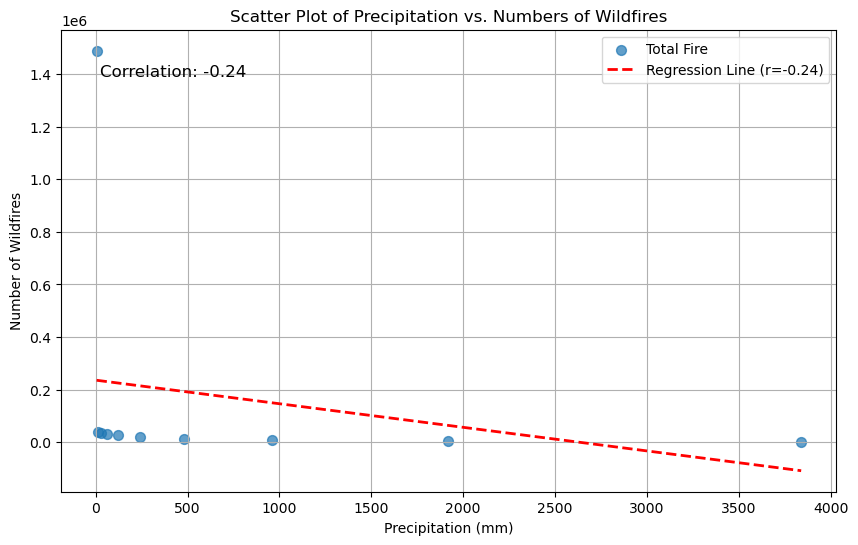

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Intervalle solle mit dem Faktor dynamisch steigen um Anzahl der Wildfires bei erhöhter Regenmenge zu clustern

# Calculate dynamic x tick intervals
intervals = []
start = 0
end = 10
while end <= result['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Wandel in eindimensionale Liste aus Tupeln
intervals_flat = [interval for intervals in intervals for interval in intervals]


# Gruppierung und Zählen der eindeutigen Wildfires (unique_id) in den Intervallen
grouped_data = result.groupby(pd.cut(result['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['unique_id'].sum().reset_index()
grouped_data.rename(columns={'unique_id': 'Anzahl_der_Wildfires'}, inplace=True)


# Extrahiere die Intervallmitte für die x-Achse und konvertiere sie in numerische Werte
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Anzahl_der_Wildfires'], label=f'Total Fire', marker='o', s=50, alpha=0.7)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Number of Wildfires')
plt.title('Scatter Plot of Precipitation vs. Numbers of Wildfires')

# Berechne die Korrelation zwischen den Daten
correlation = np.corrcoef(x_midpoints, grouped_data['Anzahl_der_Wildfires'])[0, 1]

# Zeige die Korrelationsinformation im Plot an
plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Berechne die Regressionslinie
slope, intercept = np.polyfit(x_midpoints, grouped_data['Anzahl_der_Wildfires'], 1)

# Zeichne die Regressionslinie
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linestyle='--', linewidth=2, label=f'Regression Line (r={correlation:.2f})')

# Plot anzeigen
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


  precipitation_mm  Summe_der_Feuergröße_pro_Tag
0         (-1, 10]                  4.917135e+09
1         (10, 20]                  2.104875e+08
2         (20, 40]                  1.673499e+08
3         (40, 80]                  1.103877e+08
4        (80, 160]                  4.960299e+07
5       (160, 320]                  2.771403e+07
6       (320, 640]                  2.001484e+07
7      (640, 1280]                  8.330646e+06
8     (1280, 2560]                  3.623395e+06
9     (2560, 5120]                  4.353026e+05


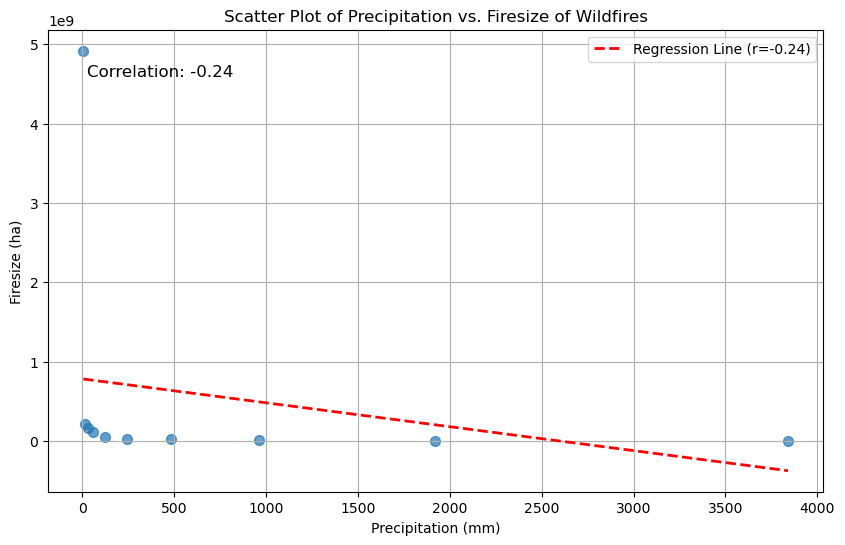

In [398]:
intervals = []
start = 0
end = 10
while end <= result['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Wandeln Sie die Intervalle in eine eindimensionale Liste von Tupeln um
intervals_flat = [interval for intervals in intervals for interval in intervals]

# Gruppierung und Berechnung der Summe der Feuergröße pro Tag in den Intervallen
grouped_data = result.groupby(pd.cut(result['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['fire_size_per_day'].sum().reset_index()
grouped_data.rename(columns={'fire_size_per_day': 'Summe_der_Feuergröße_pro_Tag'}, inplace=True)

# Extrahiere die Intervallmitte für die x-Achse und konvertiere sie in numerische Werte
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Summe_der_Feuergröße_pro_Tag'], marker='o', s=50, alpha=0.7)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Firesize (ha)')
plt.title('Scatter Plot of Precipitation vs. Firesize of Wildfires')

# Berechne die Korrelation zwischen den Daten
correlation = np.corrcoef(x_midpoints, grouped_data['Summe_der_Feuergröße_pro_Tag'])[0, 1]

# Zeige die Korrelationsinformation im Plot an
plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Berechne die Regressionslinie
slope, intercept = np.polyfit(x_midpoints, grouped_data['Summe_der_Feuergröße_pro_Tag'], 1)

# Zeichne die Regressionslinie
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linestyle='--', linewidth=2, label=f'Regression Line (r={correlation:.2f})')

# Plot anzeigen
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


  precipitation_mm  Summe_der_Feuerdauer_pro_Tag
0         (-1, 10]                    36155958.0
1         (10, 20]                     1559057.0
2         (20, 40]                     1246709.0
3         (40, 80]                      752099.0
4        (80, 160]                      363187.0
5       (160, 320]                      202454.0
6       (320, 640]                      112537.0
7      (640, 1280]                       48216.0
8     (1280, 2560]                       20053.0
9     (2560, 5120]                        2038.0


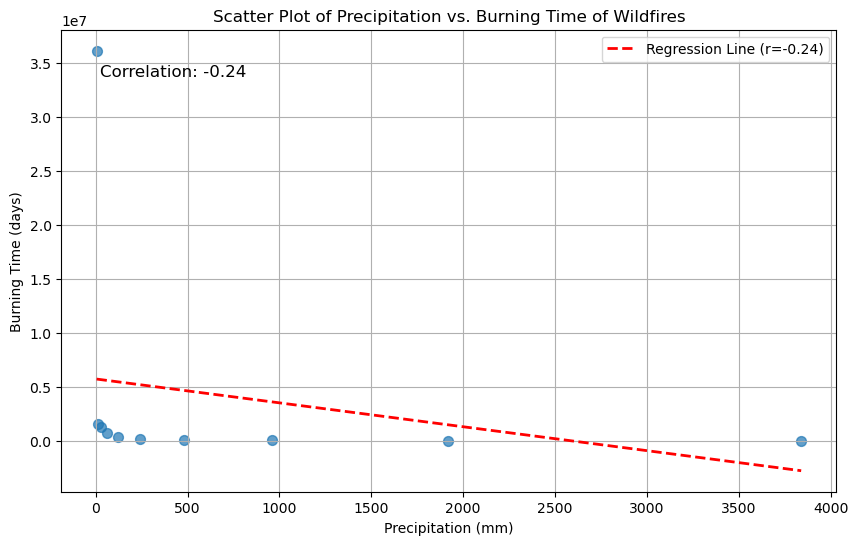

In [403]:
# Calculate dynamic x tick intervals
intervals = []
start = 0
end = 10
while end <= result['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Wandeln Sie die Intervalle in eine eindimensionale Liste von Tupeln um
intervals_flat = [interval for intervals in intervals for interval in intervals]

# Gruppierung und Berechnung der Summe der Feuerdauer pro Tag in den Intervallen
grouped_data = result.groupby(pd.cut(result['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['fire_duration_per_day'].sum().reset_index()
grouped_data.rename(columns={'fire_duration_per_day': 'Summe_der_Feuerdauer_pro_Tag'}, inplace=True)

# Extrahiere die Intervallmitte für die x-Achse und konvertiere sie in numerische Werte
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Summe_der_Feuerdauer_pro_Tag'], marker='o', s=50, alpha=0.7)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Burning Time (days)')
plt.title('Scatter Plot of Precipitation vs. Burning Time of Wildfires')

# Berechne die Korrelation zwischen den Daten
correlation = np.corrcoef(x_midpoints, grouped_data['Summe_der_Feuerdauer_pro_Tag'])[0, 1]

# Zeige die Korrelationsinformation im Plot an
plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Berechne die Regressionslinie
slope, intercept = np.polyfit(x_midpoints, grouped_data['Summe_der_Feuerdauer_pro_Tag'], 1)

# Zeichne die Regressionslinie
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linestyle='--', linewidth=2, label=f'Regression Line (r={correlation:.2f})')

# Plot anzeigen
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


Number of Wildfires in Top 5 States

  precipitation_mm  Sum of Unique ID
0         (-1, 10]            306513
1         (10, 20]              8604
2         (20, 40]              7090
3         (40, 80]              6194
4        (80, 160]              4153
5       (160, 320]              1812
6       (320, 640]               539


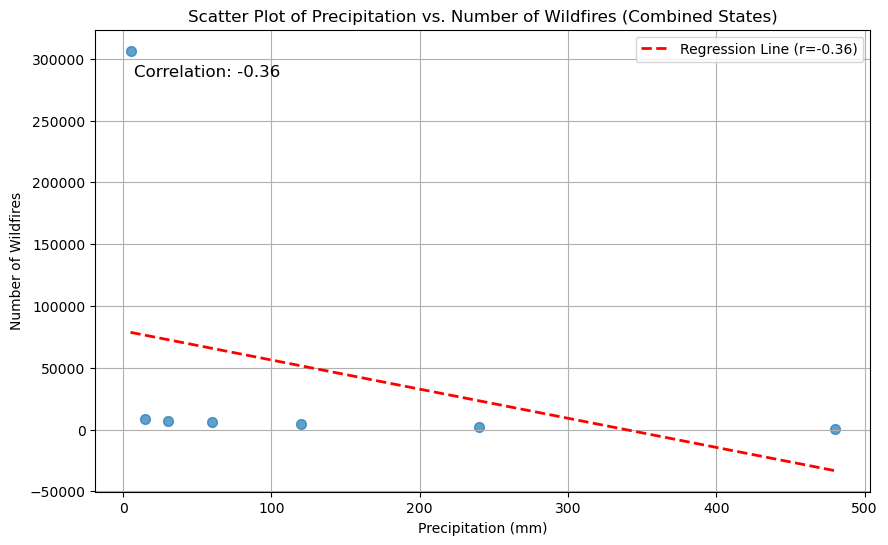

In [440]:
# Filter data for the specified states
selected_states = ['Idaho', 'Oregon', 'California', 'Arizona', 'New Mexico']
filtered_result = result[result['state_name'].isin(selected_states)]

# Calculate dynamic x tick intervals
intervals = []
start = 0
end = 10
while end <= filtered_result['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Convert the intervals into a one-dimensional list of tuples
intervals_flat = [interval for intervals in intervals for interval in intervals]

# Group and calculate the sum of unique_id per day in the intervals
grouped_data = filtered_result.groupby(pd.cut(filtered_result['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['unique_id'].sum().reset_index()
grouped_data.rename(columns={'unique_id': 'Sum of Unique ID'}, inplace=True)

# Extract the interval midpoints for the x-axis and convert them to numeric values
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Sum of Unique ID'], marker='o', s=50, alpha=0.7)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Number of Wildfires')
plt.title('Scatter Plot of Precipitation vs. Number of Wildfires (Combined States)')

# Calculate the correlation between the data
correlation = np.corrcoef(x_midpoints, grouped_data['Sum of Unique ID'])[0, 1]

# Show the correlation information in the plot
plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Calculate the regression line
slope, intercept = np.polyfit(x_midpoints, grouped_data['Sum of Unique ID'], 1)

# Draw the regression line
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linestyle='--', linewidth=2, label=f'Regression Line (r={correlation:.2f})')

# Display the plot
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


idaho

  precipitation_mm  Anzahl_der_Wildfires
0         (-1, 10]                 27717
1         (10, 20]                   925
2         (20, 40]                   639
3         (40, 80]                   765
4        (80, 160]                   267
5       (160, 320]                    23


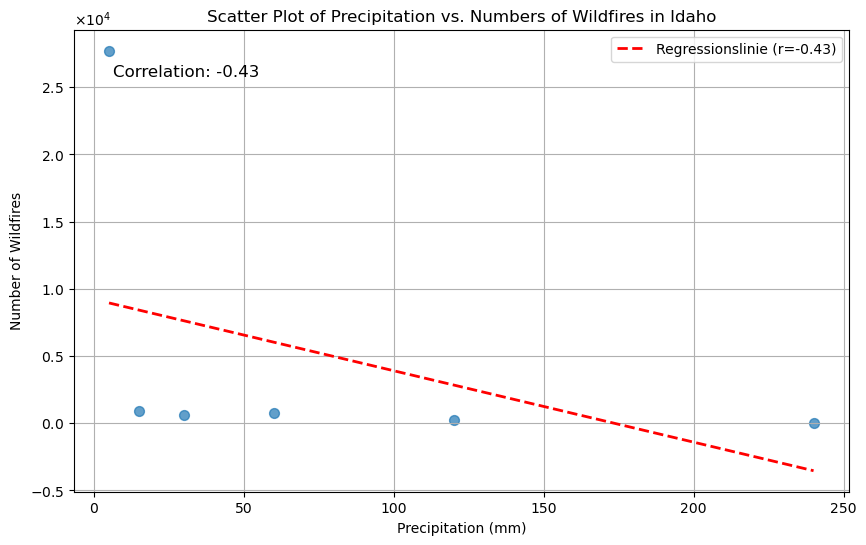

In [376]:
# Filtern Sie die Daten für den Bundesstaat Idaho
idaho_data = result[result['state_name'] == 'Idaho']

# Calculate dynamic x tick intervals
intervals = []
start = 0
end = 10
while end <= idaho_data['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Convert intervals to a one-dimensional list of tuples
intervals_flat = [interval for intervals in intervals for interval in intervals]

# Group and count wildfires within the intervals
grouped_data = idaho_data.groupby(pd.cut(idaho_data['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['unique_id'].sum().reset_index()
grouped_data.rename(columns={'unique_id': 'Anzahl_der_Wildfires'}, inplace=True)

# Extract the interval midpoints for the x-axis and convert them to numeric values
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Anzahl_der_Wildfires'], marker='o', s=50, alpha=0.7)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Number of Wildfires')
plt.title('Scatter Plot of Precipitation vs. Numbers of Wildfires in Idaho')

# Format the y-axis to display in scientific notation (10^5)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Calculate the correlation between the data
correlation = np.corrcoef(x_midpoints, grouped_data['Anzahl_der_Wildfires'])[0, 1]

# Display the correlation information in the plot
plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Calculate the regression line
slope, intercept = np.polyfit(x_midpoints, grouped_data['Anzahl_der_Wildfires'], 1)

# Plot the regression line
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linestyle='--', linewidth=2, label=f'Regression Line (r={correlation:.2f})')

# Show the plot
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


  precipitation_mm  Summe_der_Feuergröße_pro_Tag
0         (-1, 10]                  1.261225e+08
1         (10, 20]                  3.200081e+06
2         (20, 40]                  1.377410e+06
3         (40, 80]                  6.538365e+05
4        (80, 160]                  8.770401e+04
5       (160, 320]                  8.374038e+04


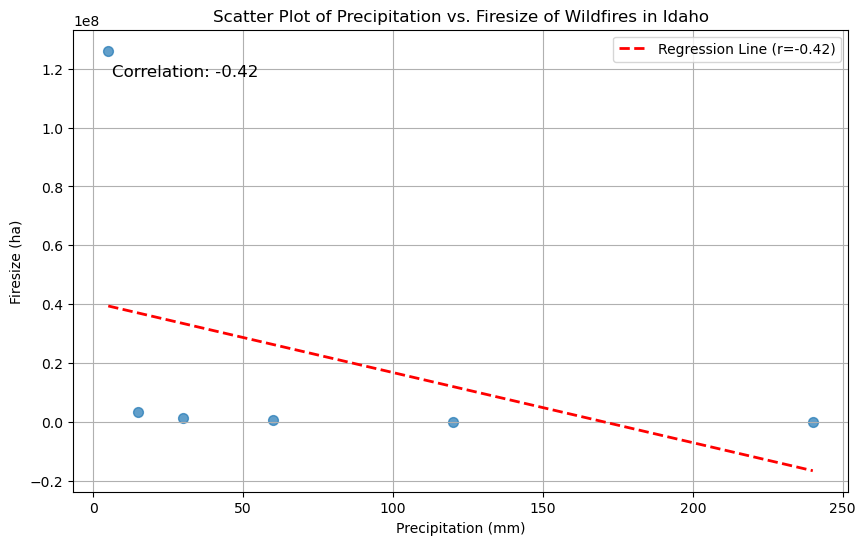

In [397]:

# Filtern Sie die Daten für den Bundesstaat Idaho
idaho_data = result[result['state_name'] == 'Idaho']

# Calculate dynamic x tick intervals
intervals = []
start = 0
end = 10
while end <= idaho_data['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Convert intervals to a one-dimensional list of tuples
intervals_flat = [interval for intervals in intervals for interval in intervals]

# Group and calculate the sum of fire size per day within the intervals
grouped_data = idaho_data.groupby(pd.cut(idaho_data['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['fire_size_per_day'].sum().reset_index()
grouped_data.rename(columns={'fire_size_per_day': 'Summe_der_Feuergröße_pro_Tag'}, inplace=True)

# The majority of wildfires occurred on days with low precipitation

# Extract the interval midpoints for the x-axis and convert them to numeric values
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Summe_der_Feuergröße_pro_Tag'], marker='o', s=50, alpha=0.7)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Firesize (ha)')
plt.title('Scatter Plot of Precipitation vs. Firesize of Wildfires in Idaho')

# Calculate the correlation between the data
correlation = np.corrcoef(x_midpoints, grouped_data['Summe_der_Feuergröße_pro_Tag'])[0, 1]

# Display the correlation information in the plot
plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Calculate the regression line
slope, intercept = np.polyfit(x_midpoints, grouped_data['Summe_der_Feuergröße_pro_Tag'], 1)

# Plot the regression line
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linestyle='--', linewidth=2, label=f'Regression Line (r={correlation:.2f})')

# Show the plot
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


  precipitation_mm  Summe_der_Feuerdauer_pro_Tag
0         (-1, 10]                      907369.0
1         (10, 20]                       36014.0
2         (20, 40]                       10176.0
3         (40, 80]                        5420.0
4        (80, 160]                        1245.0
5       (160, 320]                         475.0


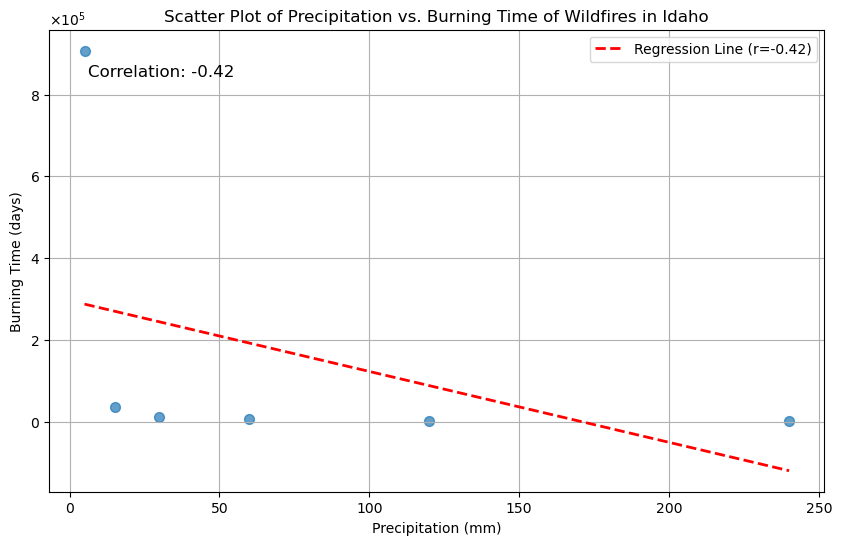

In [404]:
# Filtern Sie die Daten für den Bundesstaat Idaho
idaho_data = result[result['state_name'] == 'Idaho']

# Calculate dynamic x tick intervals
intervals = []
start = 0
end = 10
while end <= idaho_data['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Convert intervals to a one-dimensional list of tuples
intervals_flat = [interval for intervals in intervals for interval in intervals]

# Group and calculate the sum of fire duration per day within the intervals
grouped_data = idaho_data.groupby(pd.cut(idaho_data['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['fire_duration_per_day'].sum().reset_index()
grouped_data.rename(columns={'fire_duration_per_day': 'Summe_der_Feuerdauer_pro_Tag'}, inplace=True)

# Extract the interval midpoints for the x-axis and convert them to numeric values
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Summe_der_Feuerdauer_pro_Tag'], marker='o', s=50, alpha=0.7)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Burning Time (days)')
plt.title('Scatter Plot of Precipitation vs. Burning Time of Wildfires in Idaho')

# Format the y-axis to display in scientific notation (10^5)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Calculate the correlation between the data
correlation = np.corrcoef(x_midpoints, grouped_data['Summe_der_Feuerdauer_pro_Tag'])[0, 1]

# Display the correlation information in the plot
plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Calculate the regression line
slope, intercept = np.polyfit(x_midpoints, grouped_data['Summe_der_Feuerdauer_pro_Tag'], 1)

# Plot the regression line
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linestyle='--', linewidth=2, label=f'Regression Line (r={correlation:.2f})')

# Show the plot
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


Oregon

  precipitation_mm  Anzahl_der_Wildfires
0         (-1, 10]                 47868
1         (10, 20]                  1219
2         (20, 40]                  1166
3         (40, 80]                   853
4        (80, 160]                   575


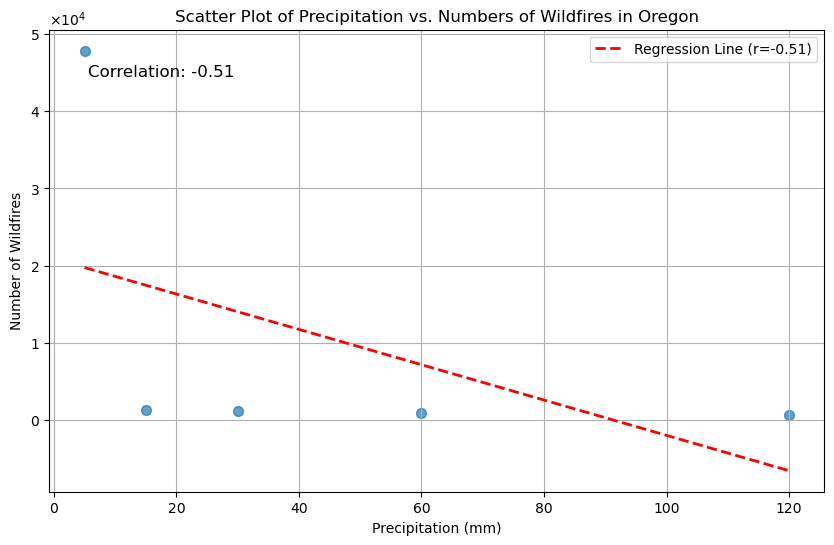

In [386]:
from matplotlib.ticker import ScalarFormatter

# Filtern Sie die Daten für den Bundesstaat Oregon
oregon_data = result[result['state_name'] == 'Oregon']

# Calculate dynamic x tick intervals
intervals = []
start = 0
end = 10
while end <= oregon_data['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Convert intervals to a one-dimensional list of tuples
intervals_flat = [interval for intervals in intervals for interval in intervals]

# Group and count wildfires within the intervals
grouped_data = oregon_data.groupby(pd.cut(oregon_data['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['unique_id'].sum().reset_index()
grouped_data.rename(columns={'unique_id': 'Anzahl_der_Wildfires'}, inplace=True)

# Extract the interval midpoints for the x-axis and convert them to numeric values
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Anzahl_der_Wildfires'], marker='o', s=50, alpha=0.7)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Number of Wildfires')
plt.title('Scatter Plot of Precipitation vs. Numbers of Wildfires in Oregon')

# Format the y-axis to display in scientific notation (10^4)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Calculate the correlation between the data
correlation = np.corrcoef(x_midpoints, grouped_data['Anzahl_der_Wildfires'])[0, 1]

# Display the correlation information in the plot
plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Calculate the regression line
slope, intercept = np.polyfit(x_midpoints, grouped_data['Anzahl_der_Wildfires'], 1)

# Plot the regression line
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linestyle='--', linewidth=2, label=f'Regression Line (r={correlation:.2f})')

# Show the plot
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


  precipitation_mm  Summe_der_Feuergröße_pro_Tag
0         (-1, 10]                  1.238481e+08
1         (10, 20]                  4.209373e+06
2         (20, 40]                  2.661565e+06
3         (40, 80]                  5.894378e+05
4        (80, 160]                  2.887863e+05


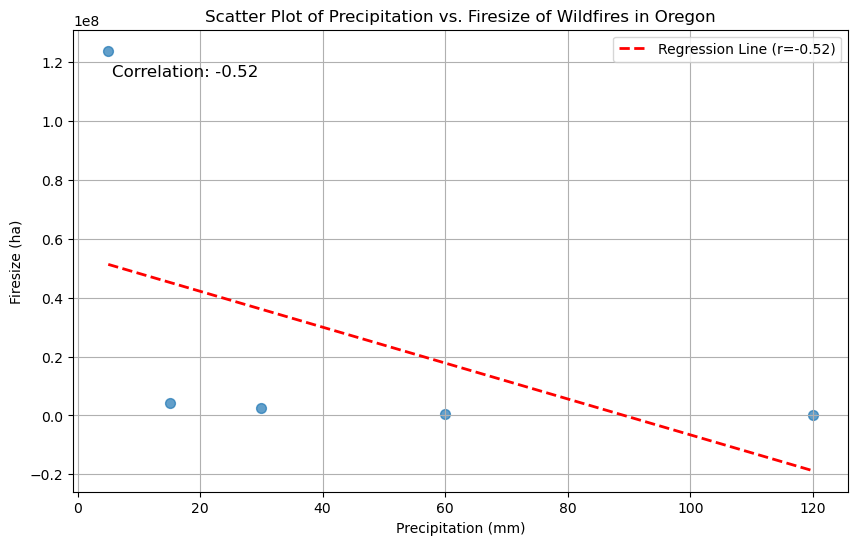

In [399]:
# Filtern Sie die Daten für den Bundesstaat Oregon
oregon_data = result[result['state_name'] == 'Oregon']

# Calculate dynamic x tick intervals
intervals = []
start = 0
end = 10
while end <= oregon_data['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Convert intervals to a one-dimensional list of tuples
intervals_flat = [interval for intervals in intervals for interval in intervals]

# Group and calculate the sum of fire size per day within the intervals
grouped_data = oregon_data.groupby(pd.cut(oregon_data['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['fire_size_per_day'].sum().reset_index()
grouped_data.rename(columns={'fire_size_per_day': 'Summe_der_Feuergröße_pro_Tag'}, inplace=True)

# Extract the interval midpoints for the x-axis and convert them to numeric values
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Summe_der_Feuergröße_pro_Tag'], marker='o', s=50, alpha=0.7)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Firesize (ha)')
plt.title('Scatter Plot of Precipitation vs. Firesize of Wildfires in Oregon')

# Calculate the correlation between the data
correlation = np.corrcoef(x_midpoints, grouped_data['Summe_der_Feuergröße_pro_Tag'])[0, 1]

# Display the correlation information in the plot
plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Calculate the regression line
slope, intercept = np.polyfit(x_midpoints, grouped_data['Summe_der_Feuergröße_pro_Tag'], 1)

# Plot the regression line
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linestyle='--', linewidth=2, label=f'Regression Line (r={correlation:.2f})')

# Show the plot
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


  precipitation_mm  Summe_der_Feuerdauer_pro_Tag
0         (-1, 10]                      895009.0
1         (10, 20]                       43068.0
2         (20, 40]                       13876.0
3         (40, 80]                        6611.0
4        (80, 160]                        3268.0


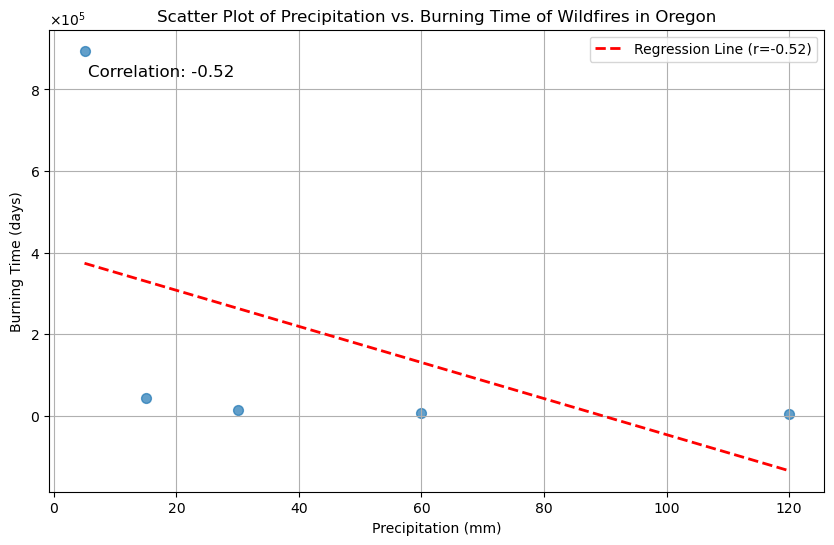

In [405]:
# Filtern Sie die Daten für den Bundesstaat Oregon
oregon_data = result[result['state_name'] == 'Oregon']

# Calculate dynamic x tick intervals
intervals = []
start = 0
end = 10
while end <= oregon_data['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Convert intervals to a one-dimensional list of tuples
intervals_flat = [interval for intervals in intervals for interval in intervals]

# Group and calculate the sum of fire duration per day within the intervals
grouped_data = oregon_data.groupby(pd.cut(oregon_data['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['fire_duration_per_day'].sum().reset_index()
grouped_data.rename(columns={'fire_duration_per_day': 'Summe_der_Feuerdauer_pro_Tag'}, inplace=True)

# Extract the interval midpoints for the x-axis and convert them to numeric values
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Summe_der_Feuerdauer_pro_Tag'], marker='o', s=50, alpha=0.7)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Burning Time (days)')
plt.title('Scatter Plot of Precipitation vs. Burning Time of Wildfires in Oregon')

# Format the y-axis to display in scientific notation (10^5)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Calculate the correlation between the data
correlation = np.corrcoef(x_midpoints, grouped_data['Summe_der_Feuerdauer_pro_Tag'])[0, 1]

# Display the correlation information in the plot
plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Calculate the regression line
slope, intercept = np.polyfit(x_midpoints, grouped_data['Summe_der_Feuerdauer_pro_Tag'], 1)

# Plot the regression line
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linestyle='--', linewidth=2, label=f'Regression Line (r={correlation:.2f})')

# Show the plot
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
California

  precipitation_mm  Anzahl_der_Wildfires
0         (-1, 10]                142402
1         (10, 20]                  5214
2         (20, 40]                  4620
3         (40, 80]                  4302
4        (80, 160]                  3150
5       (160, 320]                  1600
6       (320, 640]                   406


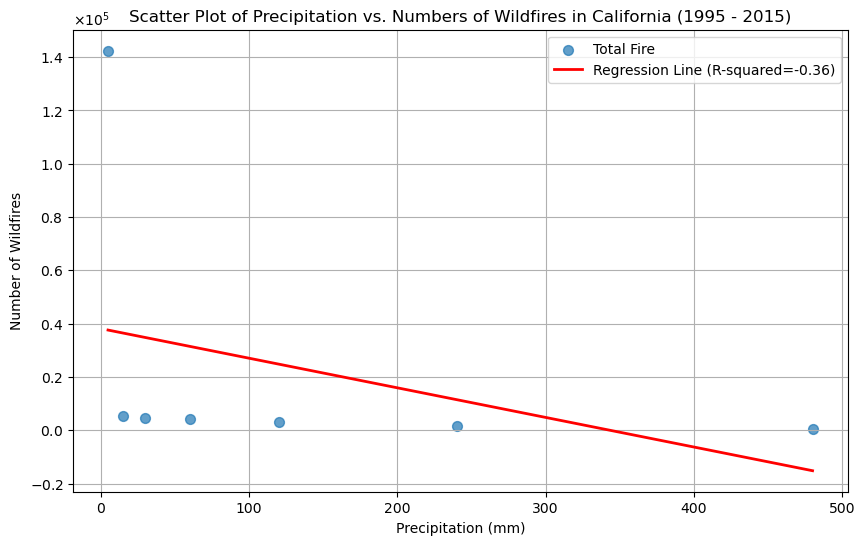

In [438]:
# Filtern Sie die Daten für den Bundesstaat Kalifornien
california_data = result[result['state_name'] == 'California']

# Calculate dynamic x tick intervals
intervals = []
start = 0
end = 10
while end <= california_data['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Convert intervals to a one-dimensional list of tuples
intervals_flat = [interval for intervals in intervals for interval in intervals]

# Group and count wildfires within the intervals
grouped_data = california_data.groupby(pd.cut(california_data['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['unique_id'].sum().reset_index()
grouped_data.rename(columns={'unique_id': 'Anzahl_der_Wildfires'}, inplace=True)

# Extract the interval midpoints for the x-axis and convert them to numeric values
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Anzahl_der_Wildfires'], marker='o', s=50, alpha=0.7, label="Total Fire")
plt.xlabel('Precipitation (mm)')
plt.ylabel('Number of Wildfires')
plt.title('Scatter Plot of Precipitation vs. Numbers of Wildfires in California (1995 - 2015)')

# Format the y-axis to display in scientific notation (10^5)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Calculate the correlation between the data
correlation = np.corrcoef(x_midpoints, grouped_data['Anzahl_der_Wildfires'])[0, 1]

# Display the correlation information in the plot
#plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Calculate the regression line
slope, intercept = np.polyfit(x_midpoints, grouped_data['Anzahl_der_Wildfires'], 1)

# Plot the regression line
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linewidth=2, label=f'Regression Line (R-squared={correlation:.2f})')

# Show the plot
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


  precipitation_mm  Anzahl_der_Wildfires
0         (-1, 10]                142402
1         (10, 20]                  5214
2         (20, 40]                  4620
3         (40, 80]                  4302
4        (80, 160]                  3150
5       (160, 320]                  1600
6       (320, 640]                   406


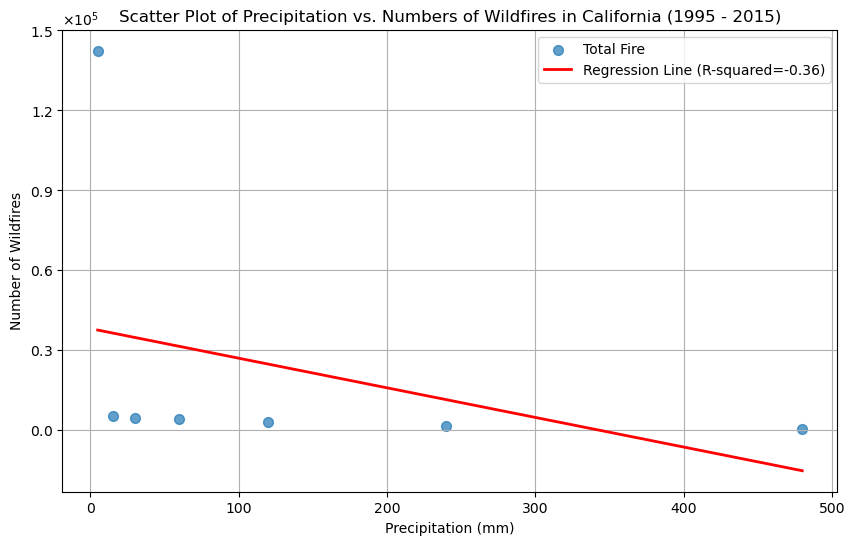

In [477]:
#Scales auf Y Achse sind verändert

# Filtern Sie die Daten für den Bundesstaat Kalifornien
california_data = result[result['state_name'] == 'California']

# Calculate dynamic x tick intervals
intervals = []
start = 0
end = 10
while end <= california_data['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Convert intervals to a one-dimensional list of tuples
intervals_flat = [interval for intervals in intervals for interval in intervals]

# Group and count wildfires within the intervals
grouped_data = california_data.groupby(pd.cut(california_data['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['unique_id'].sum().reset_index()
grouped_data.rename(columns={'unique_id': 'Anzahl_der_Wildfires'}, inplace=True)

# Extract the interval midpoints for the x-axis and convert them to numeric values
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Anzahl_der_Wildfires'], marker='o', s=50, alpha=0.7, label="Total Fire")
plt.xlabel('Precipitation (mm)')
plt.ylabel('Number of Wildfires')
plt.title('Scatter Plot of Precipitation vs. Numbers of Wildfires in California (1995 - 2015)')

# Format the y-axis to display in scientific notation (10^5)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Set the y-axis locator to show fewer gridlines
plt.gca().yaxis.set_major_locator(MaxNLocator(prune='both', nbins=6))

# Calculate the correlation between the data
correlation = np.corrcoef(x_midpoints, grouped_data['Anzahl_der_Wildfires'])[0, 1]

# Display the correlation information in the plot
#plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Calculate the regression line
slope, intercept = np.polyfit(x_midpoints, grouped_data['Anzahl_der_Wildfires'], 1)

# Plot the regression line
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linewidth=2, label=f'Regression Line (R-squared={correlation:.2f})')

# Show the plot
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


  precipitation_mm  Summe_der_Feuergröße_pro_Tag
0         (-1, 10]                  1.150209e+08
1         (10, 20]                  4.569939e+06
2         (20, 40]                  4.099592e+06
3         (40, 80]                  4.359087e+06
4        (80, 160]                  2.298539e+06
5       (160, 320]                  4.611931e+05
6       (320, 640]                  7.798119e+05


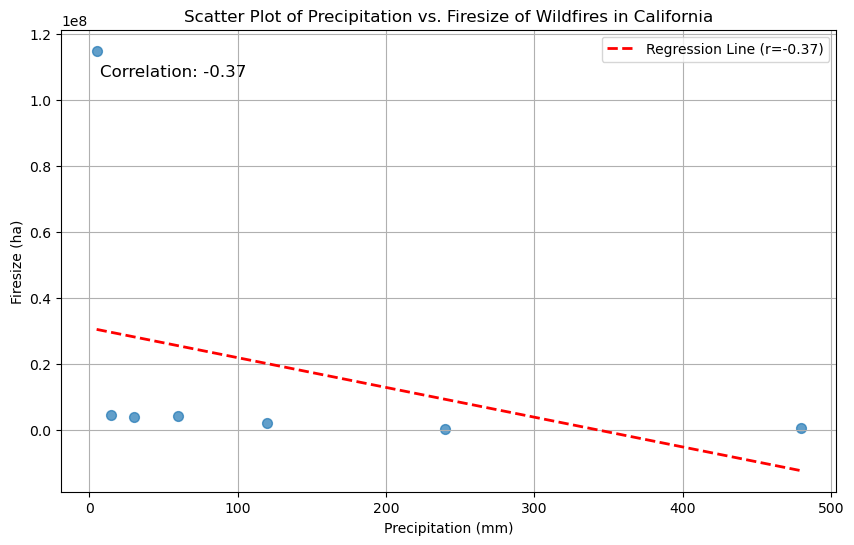

In [476]:
# Filtern Sie die Daten für den Bundesstaat Kalifornien
california_data = result[result['state_name'] == 'California']

# Calculate dynamic x tick intervals
intervals = []
start = 0
end = 10
while end <= california_data['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Convert intervals to a one-dimensional list of tuples
intervals_flat = [interval for intervals in intervals for interval in intervals]

# Group and calculate the sum of fire size per day within the intervals
grouped_data = california_data.groupby(pd.cut(california_data['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['fire_size_per_day'].sum().reset_index()
grouped_data.rename(columns={'fire_size_per_day': 'Summe_der_Feuergröße_pro_Tag'}, inplace=True)

# Extract the interval midpoints for the x-axis and convert them to numeric values
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Summe_der_Feuergröße_pro_Tag'], marker='o', s=50, alpha=0.7)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Firesize (ha)')
plt.title('Scatter Plot of Precipitation vs. Firesize of Wildfires in California')

# Calculate the correlation between the data
correlation = np.corrcoef(x_midpoints, grouped_data['Summe_der_Feuergröße_pro_Tag'])[0, 1]

# Display the correlation information in the plot
plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Calculate the regression line
slope, intercept = np.polyfit(x_midpoints, grouped_data['Summe_der_Feuergröße_pro_Tag'], 1)

# Plot the regression line
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linestyle='--', linewidth=2, label=f'Regression Line (r={correlation:.2f})')

# Show the plot
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


  precipitation_mm  Summe_der_Feuerdauer_pro_Tag
0         (-1, 10]                      869883.0
1         (10, 20]                       26287.0
2         (20, 40]                       29632.0
3         (40, 80]                       18694.0
4        (80, 160]                       11596.0
5       (160, 320]                        3680.0
6       (320, 640]                        2547.0


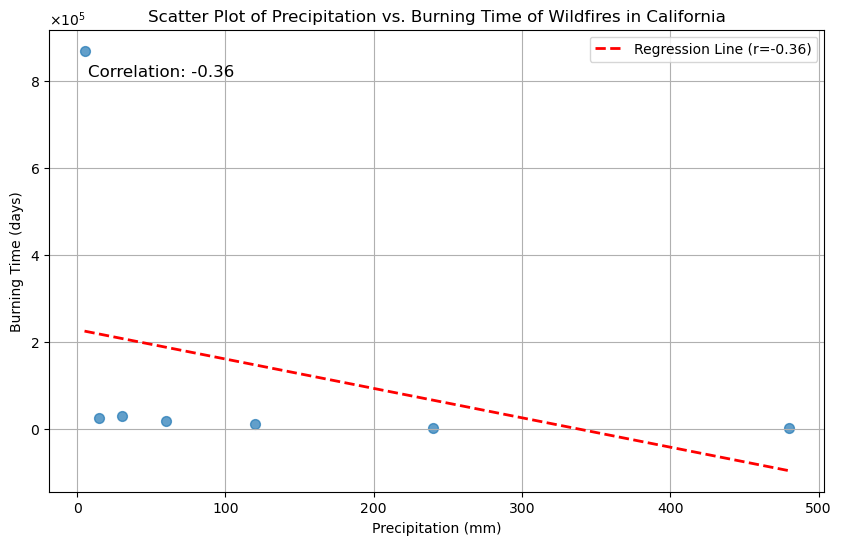

In [406]:
# Filtern Sie die Daten für den Bundesstaat Kalifornien
california_data = result[result['state_name'] == 'California']

# Calculate dynamic x tick intervals
intervals = []
start = 0
end = 10
while end <= california_data['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Convert intervals to a one-dimensional list of tuples
intervals_flat = [interval for intervals in intervals for interval in intervals]

# Group and calculate the sum of fire duration per day within the intervals
grouped_data = california_data.groupby(pd.cut(california_data['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['fire_duration_per_day'].sum().reset_index()
grouped_data.rename(columns={'fire_duration_per_day': 'Summe_der_Feuerdauer_pro_Tag'}, inplace=True)


# Extract the interval midpoints for the x-axis and convert them to numeric values
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Summe_der_Feuerdauer_pro_Tag'], marker='o', s=50, alpha=0.7)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Burning Time (days)')
plt.title('Scatter Plot of Precipitation vs. Burning Time of Wildfires in California')

# Format the y-axis to display in scientific notation (10^5)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Calculate the correlation between the data
correlation = np.corrcoef(x_midpoints, grouped_data['Summe_der_Feuerdauer_pro_Tag'])[0, 1]

# Display the correlation information in the plot
plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Calculate the regression line
slope, intercept = np.polyfit(x_midpoints, grouped_data['Summe_der_Feuerdauer_pro_Tag'], 1)

# Plot the regression line
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linestyle='--', linewidth=2, label=f'Regression Line (r={correlation:.2f})')

# Show the plot
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


arizona

  precipitation_mm  Anzahl_der_Wildfires
0         (-1, 10]                 57862
1         (10, 20]                   586
2         (20, 40]                   314
3         (40, 80]                    91
4        (80, 160]                     0


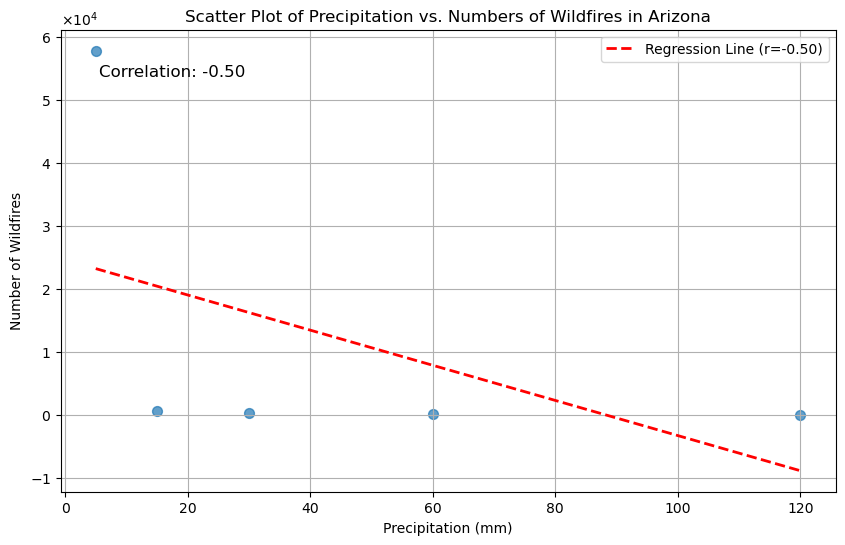

In [392]:
# Filtern Sie die Daten für den Bundesstaat Arizona
arizona_data = result[result['state_name'] == 'Arizona']

# Calculate dynamic x tick intervals
intervals = []
start = 0
end = 10
while end <= arizona_data['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Convert intervals to a one-dimensional list of tuples
intervals_flat = [interval for intervals in intervals for interval in intervals]

# Group and count wildfires within the intervals
grouped_data = arizona_data.groupby(pd.cut(arizona_data['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['unique_id'].sum().reset_index()
grouped_data.rename(columns={'unique_id': 'Anzahl_der_Wildfires'}, inplace=True)

# Extract the interval midpoints for the x-axis and convert them to numeric values
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Anzahl_der_Wildfires'], marker='o', s=50, alpha=0.7)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Number of Wildfires')
plt.title('Scatter Plot of Precipitation vs. Numbers of Wildfires in Arizona')

# Format the y-axis to display in scientific notation (10^4)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Calculate the correlation between the data
correlation = np.corrcoef(x_midpoints, grouped_data['Anzahl_der_Wildfires'])[0, 1]

# Display the correlation information in the plot
plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Calculate the regression line
slope, intercept = np.polyfit(x_midpoints, grouped_data['Anzahl_der_Wildfires'], 1)

# Plot the regression line
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linestyle='--', linewidth=2, label=f'Regression Line (r={correlation:.2f})')

# Show the plot
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


  precipitation_mm  Summe_der_Feuergröße_pro_Tag
0         (-1, 10]                  1.293043e+08
1         (10, 20]                  1.585030e+06
2         (20, 40]                  4.263600e+05
3         (40, 80]                  1.395385e+04
4        (80, 160]                  5.489200e+02


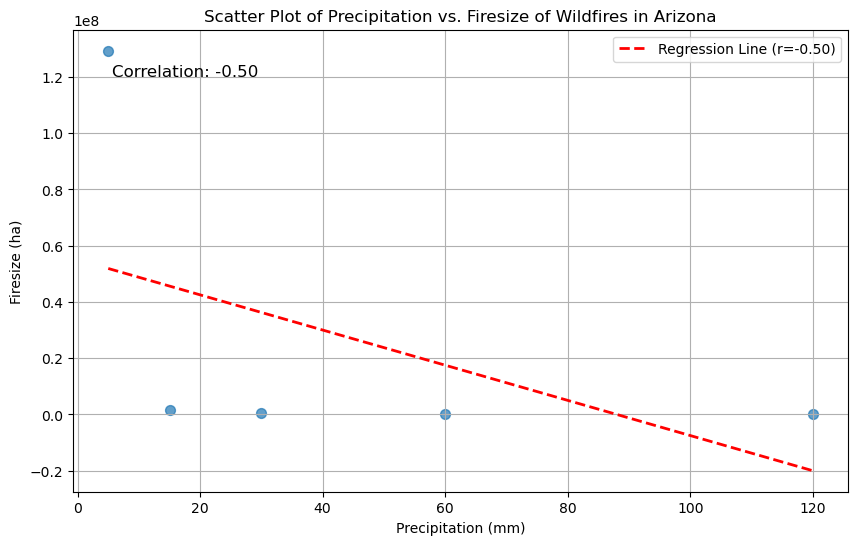

In [401]:
# Filtern Sie die Daten für den Bundesstaat Arizona
arizona_data = result[result['state_name'] == 'Arizona']

# Calculate dynamic x tick intervals
intervals = []
start = 0
end = 10
while end <= arizona_data['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Convert intervals to a one-dimensional list of tuples
intervals_flat = [interval for intervals in intervals for interval in intervals]

# Group and calculate the sum of fire size per day within the intervals
grouped_data = arizona_data.groupby(pd.cut(arizona_data['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['fire_size_per_day'].sum().reset_index()
grouped_data.rename(columns={'fire_size_per_day': 'Summe_der_Feuergröße_pro_Tag'}, inplace=True)

# Extract the interval midpoints for the x-axis and convert them to numeric values
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Summe_der_Feuergröße_pro_Tag'], marker='o', s=50, alpha=0.7)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Firesize (ha)')
plt.title('Scatter Plot of Precipitation vs. Firesize of Wildfires in Arizona')

# Calculate the correlation between the data
correlation = np.corrcoef(x_midpoints, grouped_data['Summe_der_Feuergröße_pro_Tag'])[0, 1]

# Display the correlation information in the plot
plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Calculate the regression line
slope, intercept = np.polyfit(x_midpoints, grouped_data['Summe_der_Feuergröße_pro_Tag'], 1)

# Plot the regression line
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linestyle='--', linewidth=2, label=f'Regression Line (r={correlation:.2f})')

# Show the plot
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


  precipitation_mm  Summe_der_Feuerdauer_pro_Tag
0         (-1, 10]                      940466.0
1         (10, 20]                       14978.0
2         (20, 40]                        5377.0
3         (40, 80]                         696.0
4        (80, 160]                         197.0


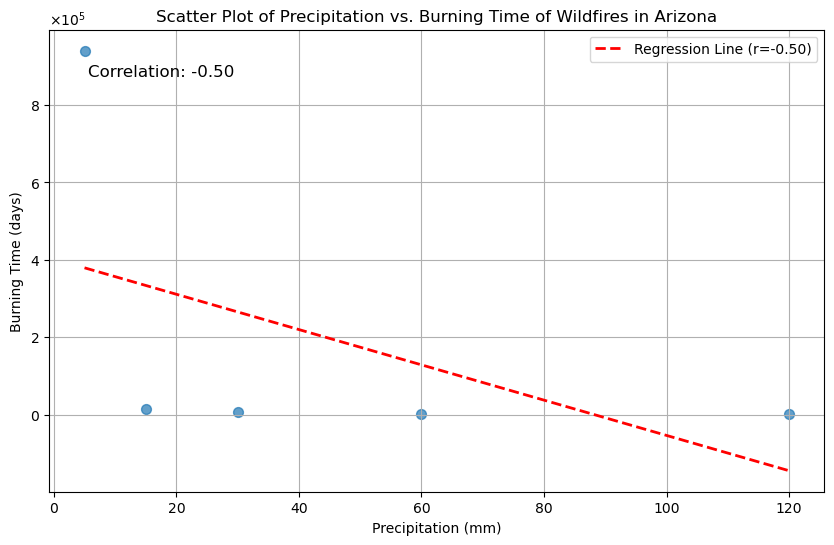

In [407]:
# Filtern Sie die Daten für den Bundesstaat Arizona
arizona_data = result[result['state_name'] == 'Arizona']

# Calculate dynamic x tick intervals
intervals = []
start = 0
end = 10
while end <= arizona_data['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Convert intervals to a one-dimensional list of tuples
intervals_flat = [interval for intervals in intervals for interval in intervals]

# Group and calculate the sum of fire duration per day within the intervals
grouped_data = arizona_data.groupby(pd.cut(arizona_data['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['fire_duration_per_day'].sum().reset_index()
grouped_data.rename(columns={'fire_duration_per_day': 'Summe_der_Feuerdauer_pro_Tag'}, inplace=True)

# Extract the interval midpoints for the x-axis and convert them to numeric values
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Summe_der_Feuerdauer_pro_Tag'], marker='o', s=50, alpha=0.7)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Burning Time (days)')
plt.title('Scatter Plot of Precipitation vs. Burning Time of Wildfires in Arizona')

# Format the y-axis to display in scientific notation (10^5)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Calculate the correlation between the data
correlation = np.corrcoef(x_midpoints, grouped_data['Summe_der_Feuerdauer_pro_Tag'])[0, 1]

# Display the correlation information in the plot
plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Calculate the regression line
slope, intercept = np.polyfit(x_midpoints, grouped_data['Summe_der_Feuerdauer_pro_Tag'], 1)

# Plot the regression line
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linestyle='--', linewidth=2, label=f'Regression Line (r={correlation:.2f})')

# Show the plot
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


new mexico

  precipitation_mm  Anzahl_der_Wildfires
0         (-1, 10]                 30664
1         (10, 20]                   660
2         (20, 40]                   351
3         (40, 80]                   183


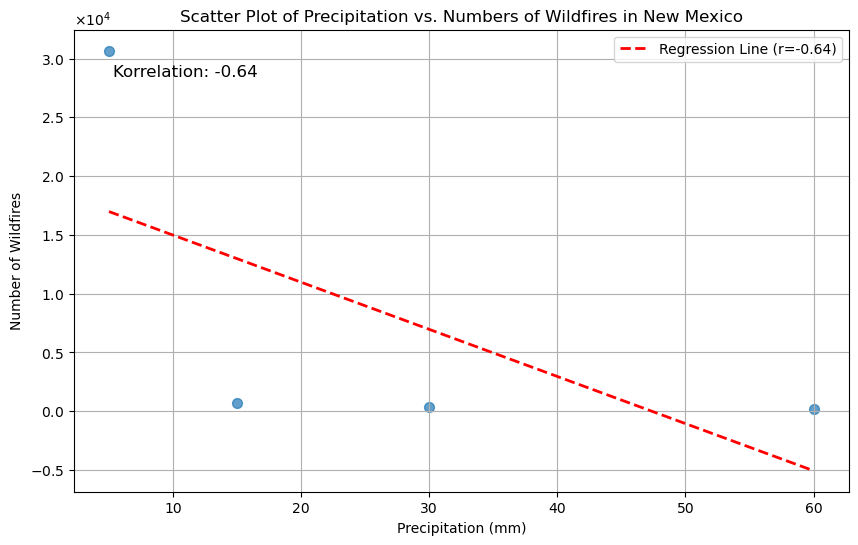

In [395]:
# Filtern Sie die Daten für den Bundesstaat New Mexico
new_mexico_data = result[result['state_name'] == 'New Mexico']

# Calculate dynamic x tick intervals
intervals = []
start = 0
end = 10
while end <= new_mexico_data['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Convert intervals to a one-dimensional list of tuples
intervals_flat = [interval for intervals in intervals for interval in intervals]

# Group and count wildfires within the intervals
grouped_data = new_mexico_data.groupby(pd.cut(new_mexico_data['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['unique_id'].sum().reset_index()
grouped_data.rename(columns={'unique_id': 'Anzahl_der_Wildfires'}, inplace=True)

# Extract the interval midpoints for the x-axis and convert them to numeric values
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Anzahl_der_Wildfires'], marker='o', s=50, alpha=0.7)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Number of Wildfires')
plt.title('Scatter Plot of Precipitation vs. Numbers of Wildfires in New Mexico')

# Format the y-axis to display in scientific notation (10^4)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
# Calculate the correlation between the data
correlation = np.corrcoef(x_midpoints, grouped_data['Anzahl_der_Wildfires'])[0, 1]

# Display the correlation information in the plot
plt.text(0.05, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Calculate the regression line
slope, intercept = np.polyfit(x_midpoints, grouped_data['Anzahl_der_Wildfires'], 1)


# Plot the regression line
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linestyle='--', linewidth=2, label=f'Regression Line (r={correlation:.2f})')

# Show the plot
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


  precipitation_mm  Summe_der_Feuergröße_pro_Tag
0         (-1, 10]                  1.258447e+08
1         (10, 20]                  4.270652e+06
2         (20, 40]                  9.833166e+05
3         (40, 80]                  3.876167e+05


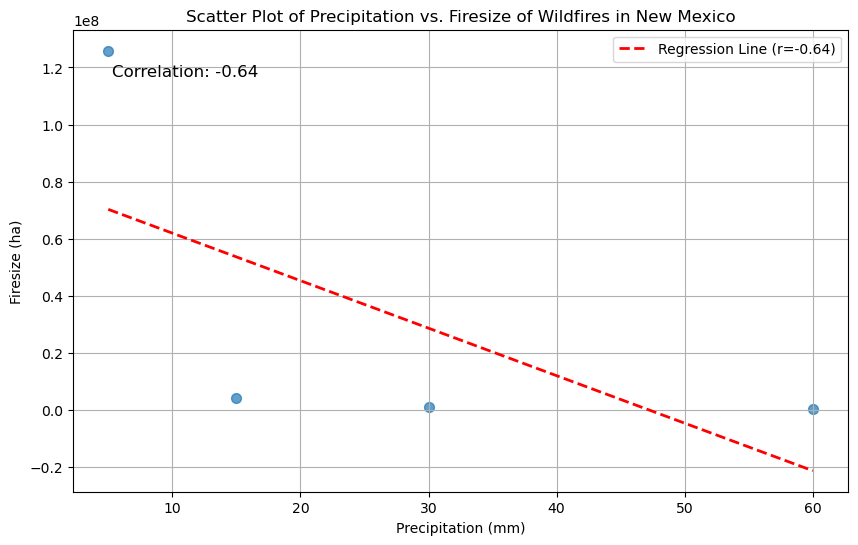

In [402]:
# Filtern Sie die Daten für den Bundesstaat New Mexico
new_mexico_data = result[result['state_name'] == 'New Mexico']

# Calculate dynamic x tick intervals
intervals = []
start = 0
end = 10
while end <= new_mexico_data['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Convert intervals to a one-dimensional list of tuples
intervals_flat = [interval for intervals in intervals for interval in intervals]

# Group and calculate the sum of fire size per day within the intervals
grouped_data = new_mexico_data.groupby(pd.cut(new_mexico_data['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['fire_size_per_day'].sum().reset_index()
grouped_data.rename(columns={'fire_size_per_day': 'Summe_der_Feuergröße_pro_Tag'}, inplace=True)


# Extract the interval midpoints for the x-axis and convert them to numeric values
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Summe_der_Feuergröße_pro_Tag'], marker='o', s=50, alpha=0.7)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Firesize (ha)')
plt.title('Scatter Plot of Precipitation vs. Firesize of Wildfires in New Mexico')

# Calculate the correlation between the data
correlation = np.corrcoef(x_midpoints, grouped_data['Summe_der_Feuergröße_pro_Tag'])[0, 1]

# Display the correlation information in the plot
plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Calculate the regression line
slope, intercept = np.polyfit(x_midpoints, grouped_data['Summe_der_Feuergröße_pro_Tag'], 1)

# Plot the regression line
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linestyle='--', linewidth=2, label=f'Regression Line (r={correlation:.2f})')

# Show the plot
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


  precipitation_mm  Summe_der_Feuerdauer_pro_Tag
0         (-1, 10]                      929771.0
1         (10, 20]                       16985.0
2         (20, 40]                       11621.0
3         (40, 80]                        2922.0


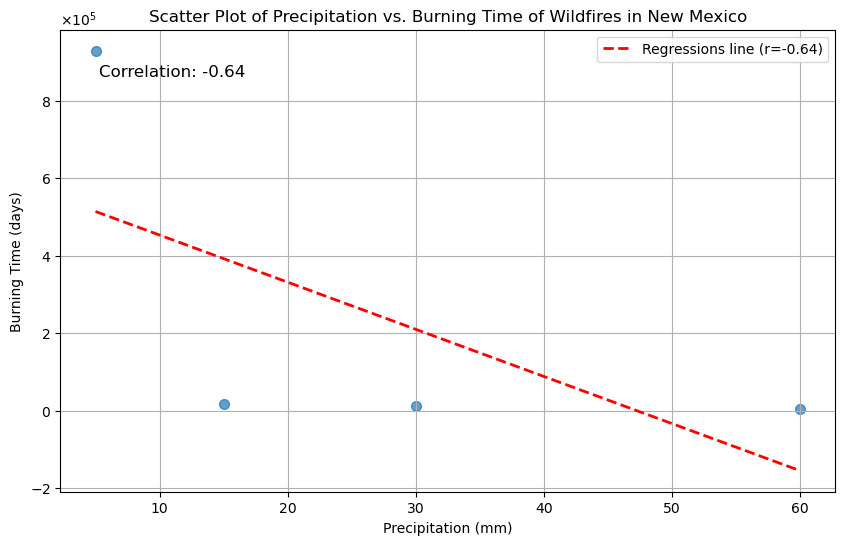

In [408]:
# Filtern Sie die Daten für den Bundesstaat New Mexico
new_mexico_data = result[result['state_name'] == 'New Mexico']

# Calculate dynamic x tick intervals
intervals = []
start = 0
end = 10
while end <= new_mexico_data['precipitation_mm'].max():
    intervals.append((start, end))
    start = end
    end *= 2

# Convert intervals to a one-dimensional list of tuples
intervals_flat = [interval for intervals in intervals for interval in intervals]

# Group and calculate the sum of fire duration per day within the intervals
grouped_data = new_mexico_data.groupby(pd.cut(new_mexico_data['precipitation_mm'], bins=intervals_flat, precision=0, include_lowest=True, duplicates='drop'))['fire_duration_per_day'].sum().reset_index()
grouped_data.rename(columns={'fire_duration_per_day': 'Summe_der_Feuerdauer_pro_Tag'}, inplace=True)

# Extract the interval midpoints for the x-axis and convert them to numeric values
x_midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_midpoints, grouped_data['Summe_der_Feuerdauer_pro_Tag'], marker='o', s=50, alpha=0.7)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Burning Time (days)')
plt.title('Scatter Plot of Precipitation vs. Burning Time of Wildfires in New Mexico')

# Format the y-axis to display in scientific notation (10^5)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Calculate the correlation between the data
correlation = np.corrcoef(x_midpoints, grouped_data['Summe_der_Feuerdauer_pro_Tag'])[0, 1]

# Display the correlation information in the plot
plt.text(0.05, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')

# Calculate the regression line
slope, intercept = np.polyfit(x_midpoints, grouped_data['Summe_der_Feuerdauer_pro_Tag'], 1)

# Plot the regression line
plt.plot(x_midpoints, slope * np.array(x_midpoints) + intercept, color='red', linestyle='--', linewidth=2, label=f'Regressions line (r={correlation:.2f})')

# Show the plot
print(grouped_data)
plt.grid(True)
plt.legend()
plt.show()


Megawildfires

In [430]:
# Filter megafires with fire_size > 100,000 by d_year
megafires_by_year = wf[wf['fire_size'] > 100000].groupby('d_year')['unique_id'].count().reset_index()

# Print the result
print(megafires_by_year)


    d_year  unique_id
0     1996          4
1     1997          4
2     1999          7
3     2000          7
4     2001          1
5     2002         13
6     2003          5
7     2004         20
8     2005         22
9     2006         14
10    2007         12
11    2008          3
12    2009         10
13    2010          3
14    2011         13
15    2012         13
16    2013          7
17    2014          4
18    2015         16


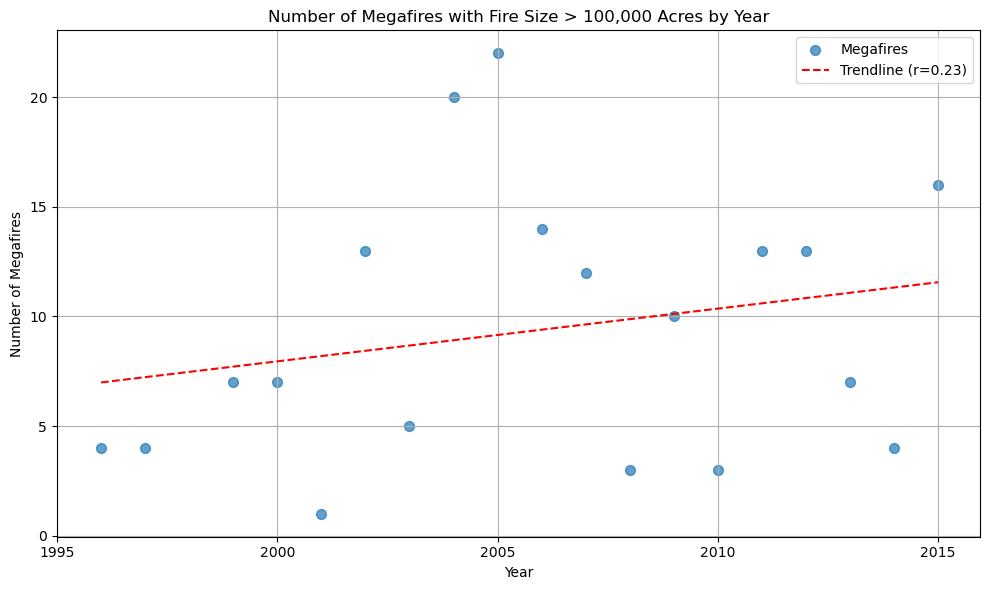

In [433]:
# Filter megafires with fire_size > 100,000 by d_year entire USA
megafires_by_year = wf[wf['fire_size'] > 100000].groupby('d_year')['unique_id'].count().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(megafires_by_year['d_year'], megafires_by_year['unique_id'], marker='o', s=50, alpha=0.7, label='Megafires')
plt.xlabel('Year')
plt.ylabel('Number of Megafires')
plt.title('Number of Megafires with Fire Size > 100,000 Acres by Year')

# Calculate and plot the trendline
slope, intercept, r_value, p_value, std_err = linregress(megafires_by_year['d_year'], megafires_by_year['unique_id'])
trendline = slope * megafires_by_year['d_year'] + intercept
plt.plot(megafires_by_year['d_year'], trendline, color='red', linestyle='--', label=f'Trendline (r={r_value:.2f})')

# Set custom x-axis ticks and labels in 5-year steps
x_ticks = np.arange(1995, megafires_by_year['d_year'].max() + 1, 5)
plt.xticks(x_ticks)

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


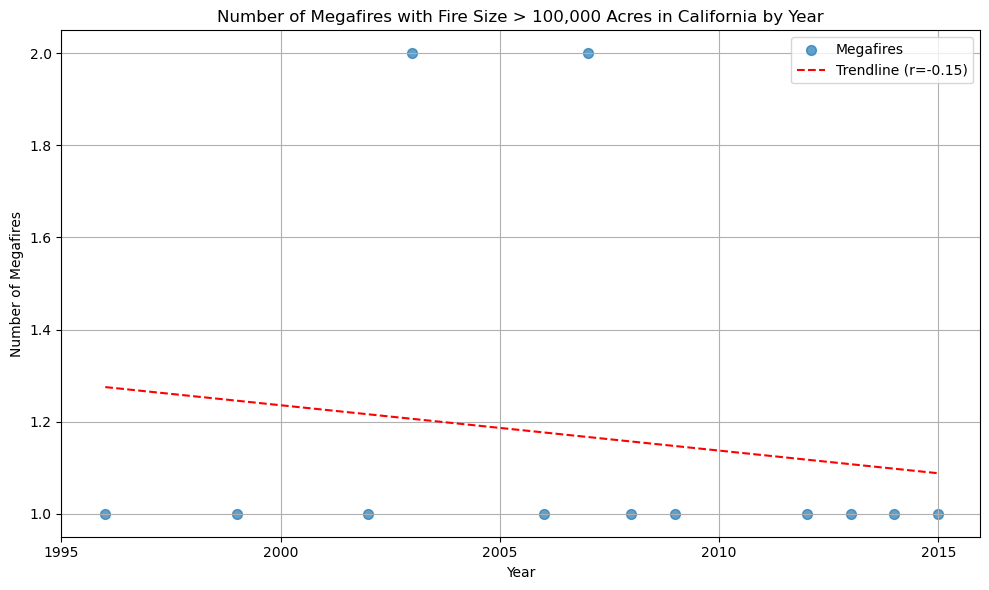

In [441]:
# Filter megafires with fire_size > 100,000 by d_year and state_name California
megafires_by_year = wf[(wf['fire_size'] > 100000) & (wf['state_name'] == 'California')].groupby('d_year')['unique_id'].count().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(megafires_by_year['d_year'], megafires_by_year['unique_id'], marker='o', s=50, alpha=0.7, label='Megafires')
plt.xlabel('Year')
plt.ylabel('Number of Megafires')
plt.title('Number of Megafires with Fire Size > 100,000 Acres in California by Year')

# Calculate and plot the trendline
slope, intercept, r_value, p_value, std_err = linregress(megafires_by_year['d_year'], megafires_by_year['unique_id'])
trendline = slope * megafires_by_year['d_year'] + intercept
plt.plot(megafires_by_year['d_year'], trendline, color='red', linestyle='--', label=f'Trendline (r={r_value:.2f})')

# Set custom x-axis ticks and labels in 5-year steps
x_ticks = np.arange(1995, megafires_by_year['d_year'].max() + 1, 5)
plt.xticks(x_ticks)

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


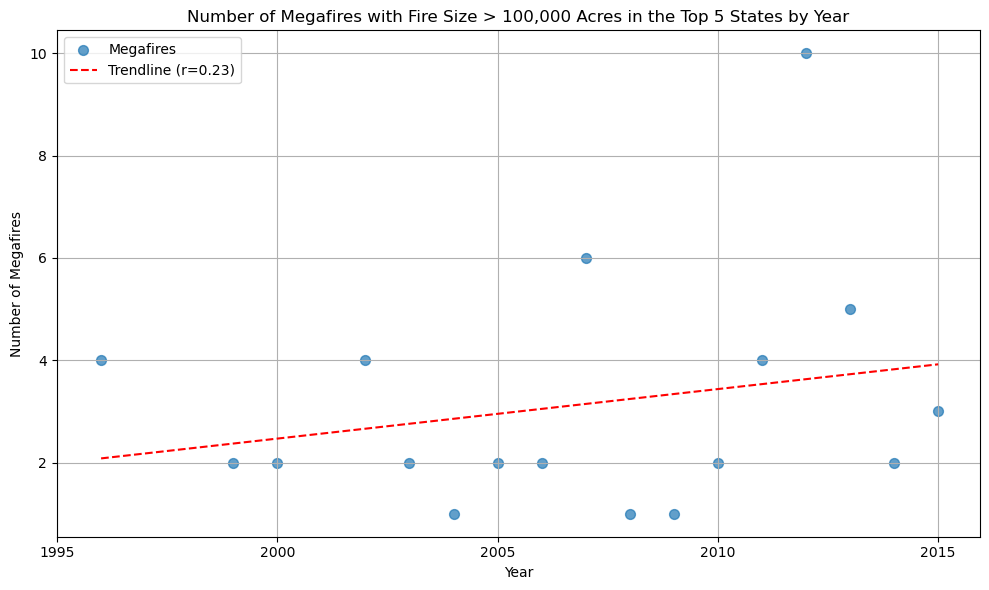

In [448]:
#Megawildfires Top 5 States

# Define the list of combined states
combined_states = ['Idaho', 'Oregon', 'California', 'Arizona', 'New Mexico']
# Define the list of combined states
combined_states = ['Idaho', 'Oregon', 'California', 'Arizona', 'New Mexico']

# Filter the DataFrame to include only the specified states
filtered_wf = wf[wf['state_name'].isin(combined_states)]


# Filter megafires with fire_size > 100,000 by d_year and specific states
megafires_by_year = wf[(wf['fire_size'] > 100000) & wf['state_name'].isin(combined_states)].groupby('d_year')['unique_id'].count().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(megafires_by_year['d_year'], megafires_by_year['unique_id'], marker='o', s=50, alpha=0.7, label='Megafires')
plt.xlabel('Year')
plt.ylabel('Number of Megafires')
plt.title('Number of Megafires with Fire Size > 100,000 Acres in the Top 5 States by Year')

# Calculate and plot the trendline
slope, intercept, r_value, p_value, std_err = linregress(megafires_by_year['d_year'], megafires_by_year['unique_id'])
trendline = slope * megafires_by_year['d_year'] + intercept
plt.plot(megafires_by_year['d_year'], trendline, color='red', linestyle='--', label=f'Trendline (r={r_value:.2f})')

# Set custom x-axis ticks and labels in 5-year steps
x_ticks = np.arange(1995, megafires_by_year['d_year'].max() + 1, 5)
plt.xticks(x_ticks)

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


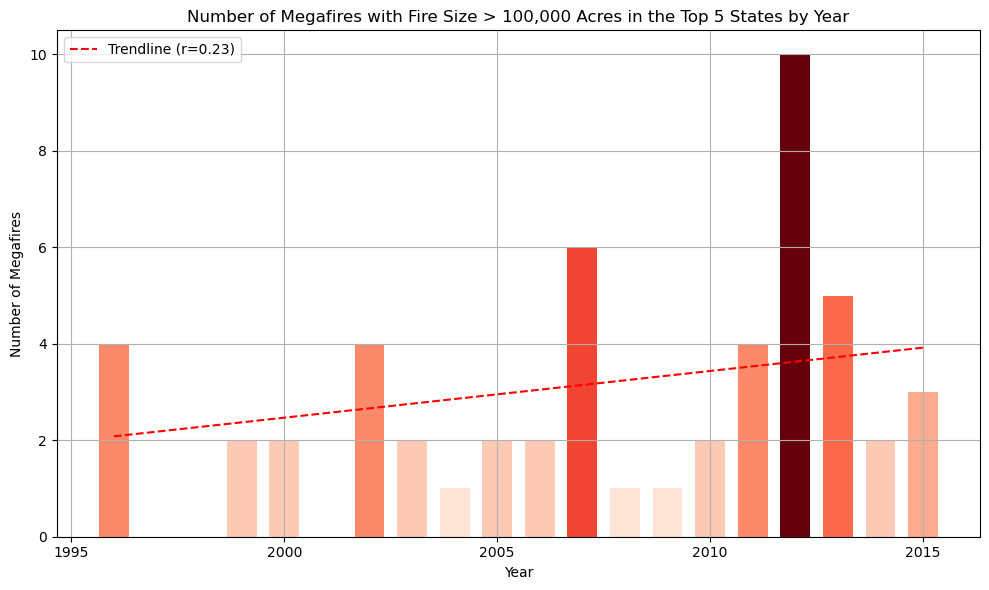

In [456]:
#Megawildfires Top 5 States in Colorized Bars

# Define the list of combined states
combined_states = ['Idaho', 'Oregon', 'California', 'Arizona', 'New Mexico']

# Filter the DataFrame to include only the specified states
filtered_wf = wf[wf['state_name'].isin(combined_states)]

# Filter megafires with fire_size > 100,000 by d_year and specific states
megafires_by_year = filtered_wf[filtered_wf['fire_size'] > 100000].groupby('d_year')['unique_id'].count().reset_index()

# Define the color map based on Y-axis values
colors = plt.cm.Reds(megafires_by_year['unique_id'] / megafires_by_year['unique_id'].max())

# Create the plot with colored bars
plt.figure(figsize=(10, 6))
bars = plt.bar(megafires_by_year['d_year'], megafires_by_year['unique_id'], width=0.7, color=colors)
plt.xlabel('Year')
plt.ylabel('Number of Megafires')
plt.title('Number of Megafires with Fire Size > 100,000 Acres in the Top 5 States by Year')

# Calculate and plot the trendline
slope, intercept, r_value, p_value, std_err = linregress(megafires_by_year['d_year'], megafires_by_year['unique_id'])
trendline = slope * megafires_by_year['d_year'] + intercept
plt.plot(megafires_by_year['d_year'], trendline, color='red', linestyle='--', label=f'Trendline (r={r_value:.2f})')

# Set custom x-axis ticks and labels in 5-year steps
x_ticks = np.arange(1995, megafires_by_year['d_year'].max() + 1, 5)
plt.xticks(x_ticks)

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
